## Phase space diatomic molecule

### Potential $V(r)$

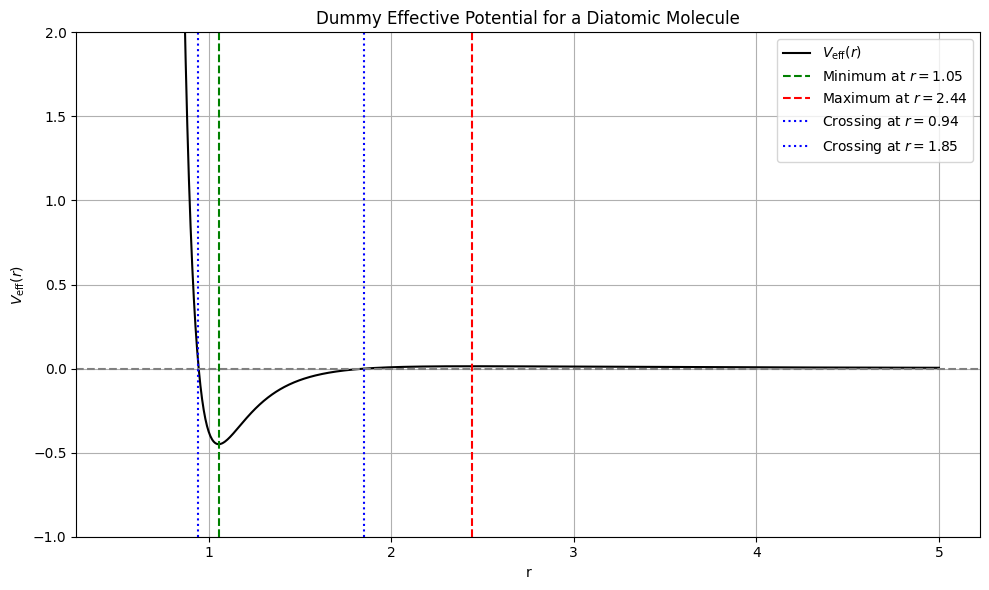

Minimum at r = 1.05, Veff = -0.45
Maximum at r = 2.44, Veff = 0.01
Crossings at r = [0.94144144 1.85135135]


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
A = 1.0      # Repulsive term coefficient
B = 1.5        # Attractive term coefficient
L = 0.5        # Angular momentum
mu = 1.0       # Reduced mass

# Define the interaction potential V(r) and effective potential Veff(r)
def V_pot(r):
    return A / (r**12) - B / (r**6)

def Veff(r, L=0.5, mu=1.0):
    return V_pot(r) + (L**2) / (2 * mu * r**2)

# Generate r values
r = np.linspace(0.5, 5.0, 1000)

# Compute Veff
V_eff = Veff(r, L, mu)

# Find approximate crossing points, minimum, and maximum by numerical differentiation
def derivative(V, r):
    return np.gradient(V, r)

dVeff = derivative(V_eff, r)
# Find where Veff crosses zero
crossings = r[np.where(np.diff(np.sign(V_eff)))[0]]
# Find minimum and maximum (where derivative is zero)
extrema_indices = np.where(np.diff(np.sign(dVeff)))[0]
r_min = r[extrema_indices[0]]  # First extremum is the minimum
r_max = r[extrema_indices[1]]  # Second extremum is the maximum

# Plot Veff
plt.figure(figsize=(10, 6))
plt.plot(r, V_eff, 'k-', label=r'$V_{\text{eff}}(r)$')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(r_min, color='green', linestyle='--', label=f'Minimum at $r={r_min:.2f}$')
plt.axvline(r_max, color='red', linestyle='--', label=f'Maximum at $r={r_max:.2f}$')
for xc in crossings:
    plt.axvline(xc, color='blue', linestyle=':', label=f'Crossing at $r={xc:.2f}$')
plt.xlabel('r')
plt.ylabel(r'$V_{\text{eff}}(r)$')
plt.title('Dummy Effective Potential for a Diatomic Molecule')
plt.grid(True)
plt.legend()
plt.ylim(-1, 2)  # Adjust y-limits to see the shape clearly
plt.tight_layout()
plt.savefig('potential')
plt.show()

# Print key points
print(f"Minimum at r = {r_min:.2f}, Veff = {Veff(r_min, L, mu):.2f}")
print(f"Maximum at r = {r_max:.2f}, Veff = {Veff(r_max, L, mu):.2f}")
print(f"Crossings at r = {crossings}")

### Phase space

/tmp/ipykernel_8919/2370986909.py:68: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(R_fine, P_R_fine, H, levels=[E_separatrix], colors='b', linestyles='--', label='Separatrix')


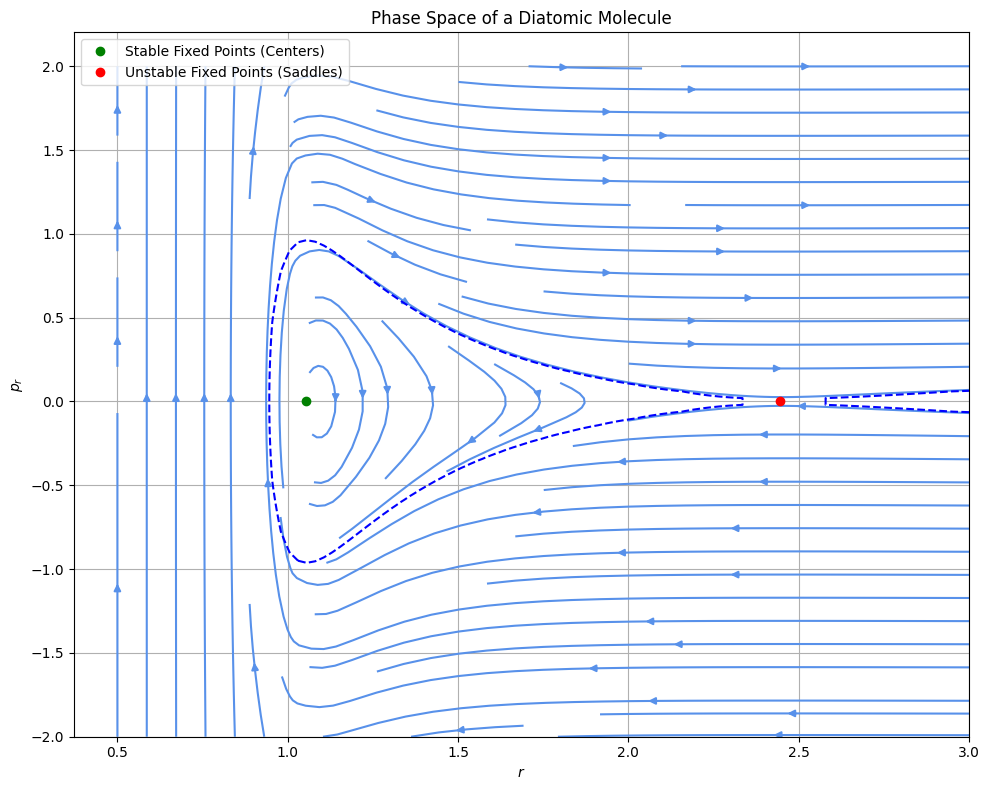

In [14]:
# Derivative of Veff for the equations of motion and finding fixed points
def dVeff_dr(r, L=0.5, mu=1.0):
    dV_dr = -12 * A / (r**13) + 6 * B / (r**7)  # Derivative of V(r)
    dcent_dr = -L**2 / (mu * r**3)              # Derivative of centrifugal term
    return dV_dr + dcent_dr

# Equations of motion: dr/dt = p_r/mu, dp_r/dt = -dVeff/dr
def equations(state, t, L=0.5, mu=1.0):
    r, p_r = state
    dr_dt = p_r / mu
    dp_r_dt = -dVeff_dr(r, L, mu)
    return [dr_dt, dp_r_dt]

# Find fixed points by solving dVeff/dr = 0 numerically
r_vals = np.linspace(0.5, 3.0, 1000)
dVeff = [dVeff_dr(r) for r in r_vals]
fixed_points = []
for i in range(len(r_vals)-1):
    if dVeff[i] * dVeff[i+1] < 0:  # Sign change indicates a root
        r_fp = (r_vals[i] + r_vals[i+1]) / 2
        fixed_points.append(r_fp)

# Classify fixed points (stable if d^2V/dr^2 > 0, unstable if < 0)
def d2Veff_dr2(r, L=0.5, mu=1.0):
    h = 1e-6
    return (dVeff_dr(r+h, L, mu) - dVeff_dr(r-h, L, mu)) / (2*h)

stable_fps = []
unstable_fps = []
for r_fp in fixed_points:
    second_deriv = d2Veff_dr2(r_fp, L, mu)
    if second_deriv > 0:
        stable_fps.append((r_fp, 0))
    else:
        unstable_fps.append((r_fp, 0))

# Create grid for phase portrait
r = np.linspace(0.5, 3.0, 20)
p_r = np.linspace(-2.0, 2.0, 20)
R, P_R = np.meshgrid(r, p_r)

# Compute vector field
U = P_R / mu
V = -np.array([[dVeff_dr(r_val, L, mu) for r_val in r] for p_r_val in p_r])

# Plot phase portrait
plt.figure(figsize=(10, 8))
plt.streamplot(R, P_R, U, V, density=1.0, color='#5891ea')

# Plot fixed points
if stable_fps:
    stable_r, stable_p = zip(*stable_fps)
    plt.plot(stable_r, stable_p, 'go', label='Stable Fixed Points (Centers)')
if unstable_fps:
    unstable_r, unstable_p = zip(*unstable_fps)
    plt.plot(unstable_r, unstable_p, 'ro', label='Unstable Fixed Points (Saddles)')

# Compute and plot the separatrix
if unstable_fps:
    r_unstable = unstable_fps[0][0]
    E_separatrix = Veff(r_unstable, L, mu)
    
    # Compute contours of the Hamiltonian H = p_r^2/(2mu) + Veff(r)
    r_fine = np.linspace(0.5, 3.0, 100)
    p_r_fine = np.linspace(-2.0, 2.0, 100)
    R_fine, P_R_fine = np.meshgrid(r_fine, p_r_fine)
    H = P_R_fine**2 / (2*mu) + Veff(R_fine, L, mu)
    plt.contour(R_fine, P_R_fine, H, levels=[E_separatrix], colors='b', linestyles='--', label='Separatrix')

# Customize plot
plt.xlabel('$r$')
plt.ylabel('$p_r$')
plt.title('Phase Space of a Diatomic Molecule')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('phase_space')
plt.show()